## Lecture 8 Example

**Multiple Linear Regression**

Diagnostics and Model Building

---

We want to find a "best" model for predicting miles per gallon based on the given data. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes:

- ``mpg`` - miles per gallon: continuous
- ``cyl`` - cylinders: multi-valued discrete
- ``disp`` - displacement: continuous
- ``hp`` - horsepower: continuous
- ``wt`` -  weight: continuous
- ``acc`` - acceleration: continuous
- ``year`` - model year: multi-valued discrete
- ``origin`` - car origin: multi-valued discrete
- ``name`` - car name: string (unique for each instance)

Data source: [Marchine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

---

### Step 1.

Read and visually inspect the data. Fit a model based on observations. Add new terms to the model and/or make transformations of variables, if needed.

In [1]:
auto = read.csv("https://raw.githubusercontent.com/uqglmn/sm/main/mlr/auto.csv")
str(auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg   : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ disp  : num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp    : int  130 165 150 150 140 198 220 215 225 190 ...
 $ wt    : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acc   : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin: int  1 1 1 1 1 1 1 1 1 1 ...
 $ name  : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


In [2]:
auto$cyl = as.factor(auto$cyl)
auto$origin = as.factor(auto$origin)
str(auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg   : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl   : Factor w/ 5 levels "3","4","5","6",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ disp  : num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp    : int  130 165 150 150 140 198 220 215 225 190 ...
 $ wt    : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acc   : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin: Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ name  : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


#### Step 1.1. Raw data analysis

In [3]:
# a function that computes correlations
panel.cor = function(x, y, ...)
{
  par(usr = c(0, 1, 0, 1))
  txt = as.character(format(cor(x, y), digits=2))
  text(0.5, 0.5, txt, cex=2.5)
}

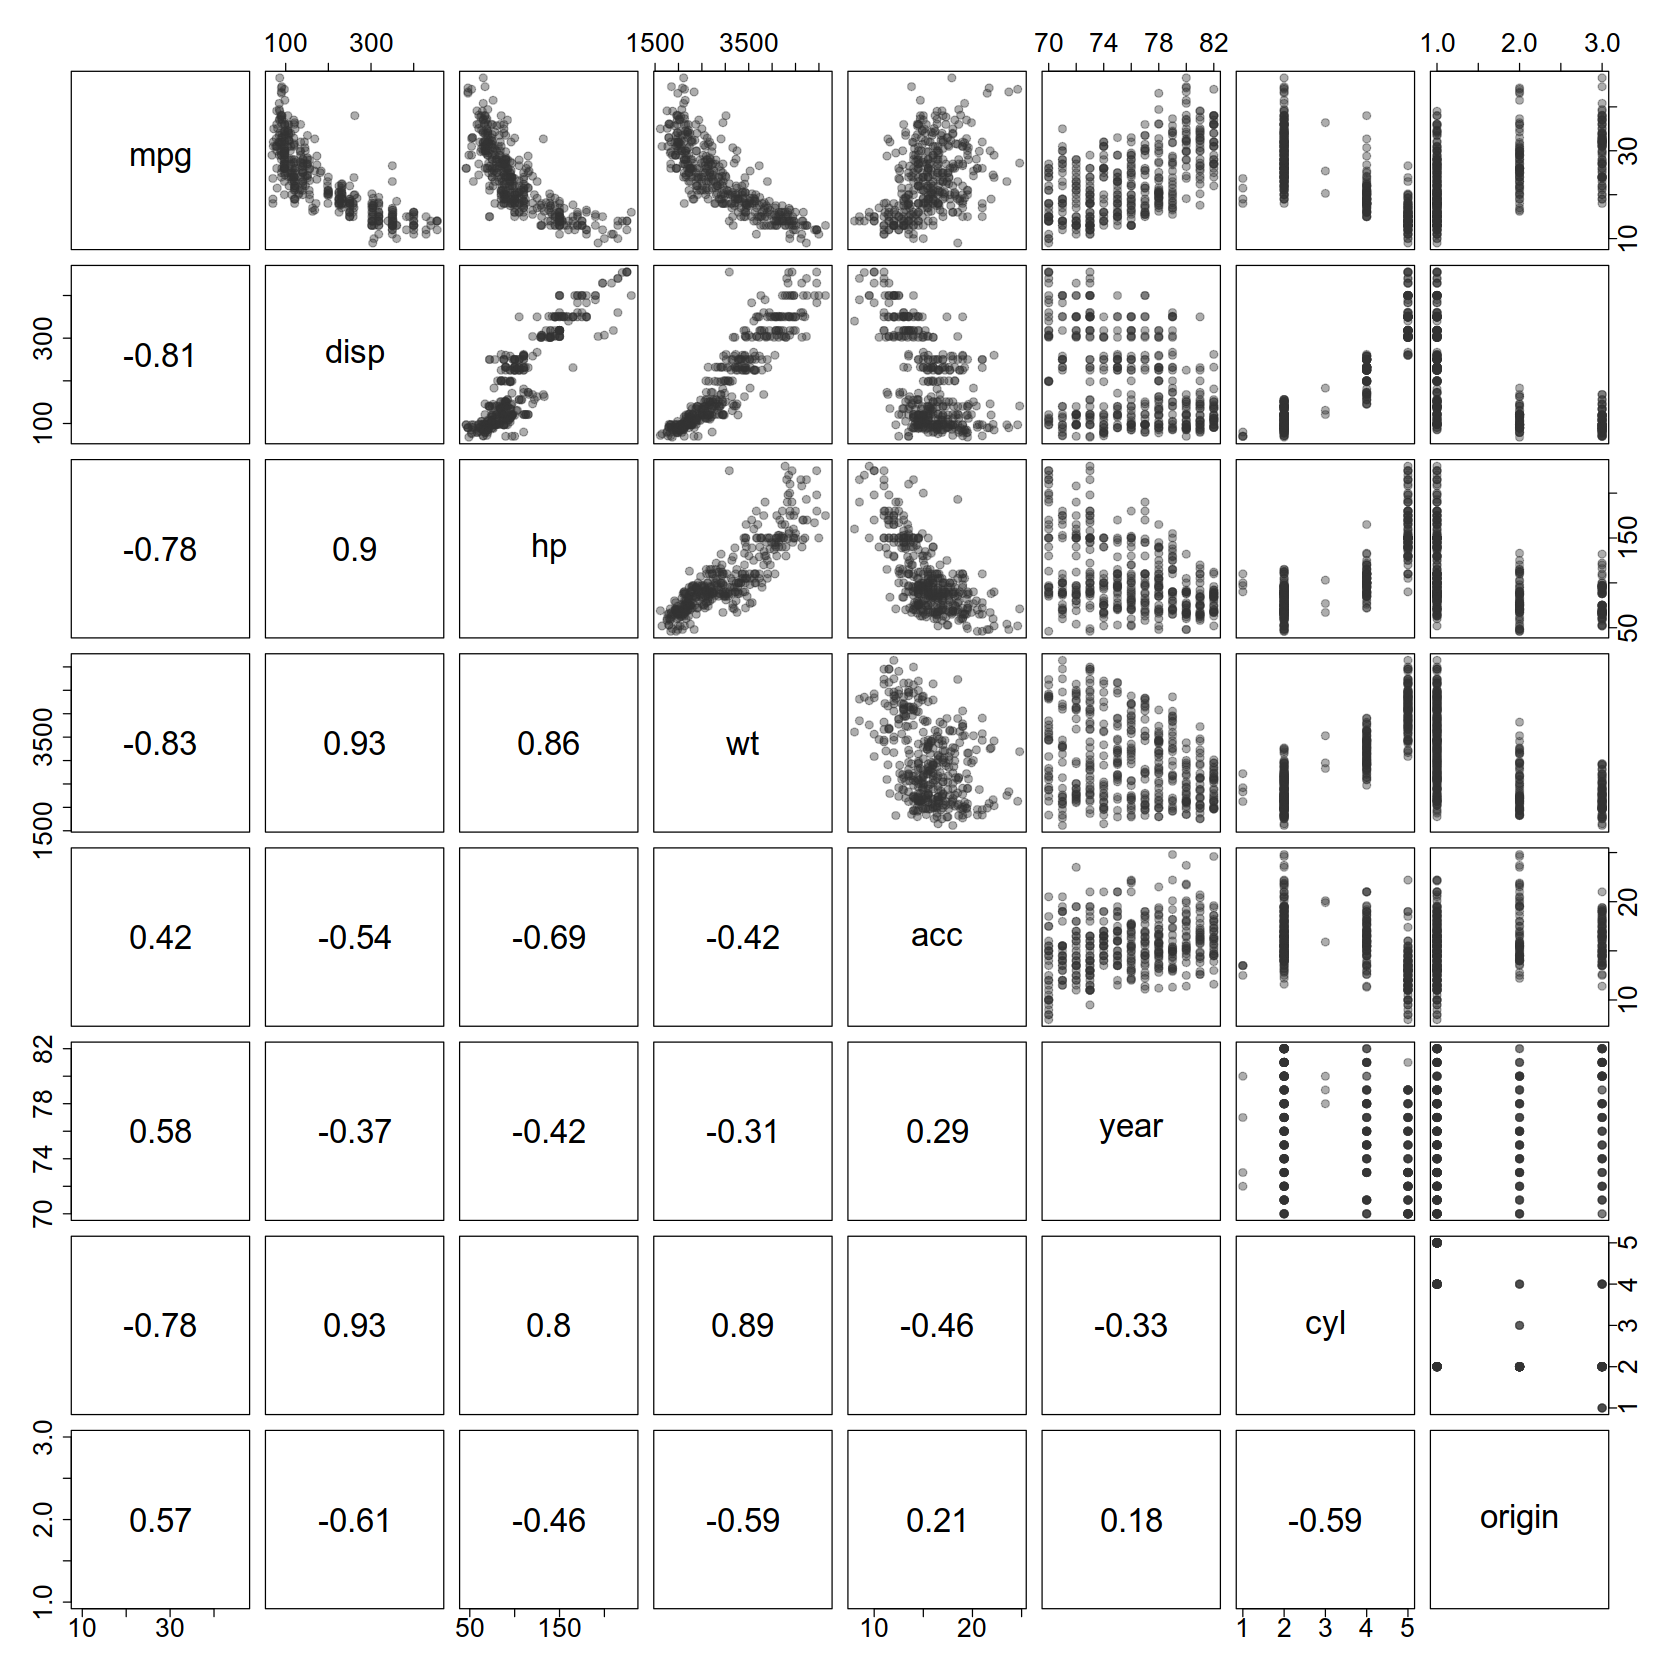

In [4]:
options(repr.plot.width=14, repr.plot.height=14)

pairs(mpg ~ disp + hp + wt + acc + year + cyl + origin, data=auto, 
      lower.panel=panel.cor, 
      cex.labels=2.5,
      cex=2,
      cex.axis=2,
      pch=20, 
      col=rgb(red=0.2, green=0.2, blue=0.2, alpha=0.4)
     )

In [5]:
model = lm(mpg ~ disp + hp + wt + acc + year + cyl + origin, data=auto)
summary(model)


Call:
lm(formula = mpg ~ disp + hp + wt + acc + year + cyl + origin, 
    data = auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6797 -1.9373 -0.0678  1.6711 12.7756 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.208e+01  4.541e+00  -4.862 1.70e-06 ***
disp         1.870e-02  7.222e-03   2.590  0.00997 ** 
hp          -3.490e-02  1.323e-02  -2.639  0.00866 ** 
wt          -5.780e-03  6.315e-04  -9.154  < 2e-16 ***
acc          2.598e-02  9.304e-02   0.279  0.78021    
year         7.370e-01  4.892e-02  15.064  < 2e-16 ***
cyl4         6.722e+00  1.654e+00   4.064 5.85e-05 ***
cyl5         7.078e+00  2.516e+00   2.813  0.00516 ** 
cyl6         3.351e+00  1.824e+00   1.837  0.06701 .  
cyl8         5.099e+00  2.109e+00   2.418  0.01607 *  
origin2      1.764e+00  5.513e-01   3.200  0.00149 ** 
origin3      2.617e+00  5.272e-01   4.964 1.04e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard er

In [6]:
# a short-cut function for a residual plot with a trend line
resplot = function(x, y, xlab, ylab)
{
    plot(x, y, 
         main=paste(ylab, "vs", xlab),    # title
         xlab=xlab, ylab=ylab,            # x and y labels
         cex.main=1, font.main=1,         # adjust font sizes
        )
    new.x = seq(min(x), max(x), length.out=50)
    lines(new.x, predict(loess(y~x), newdata=data.frame(x=new.x)), col=2, lwd=2) # add smooth trendline
}

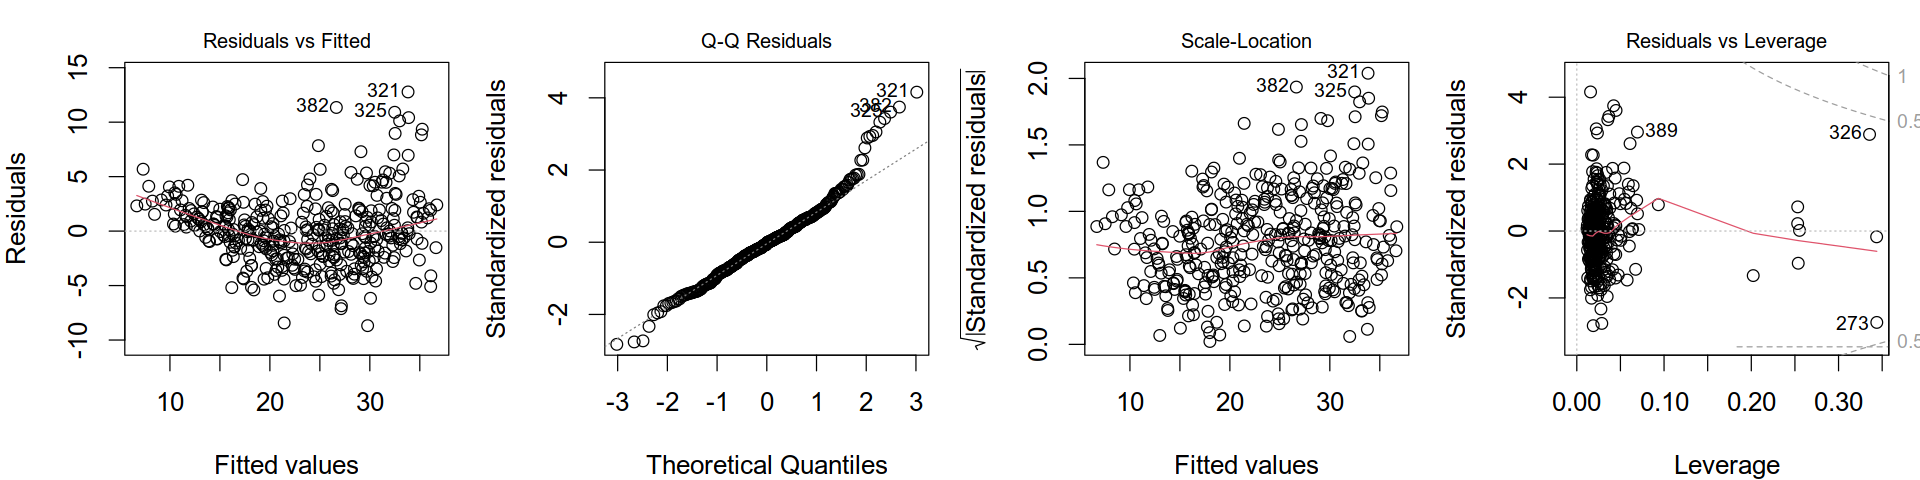

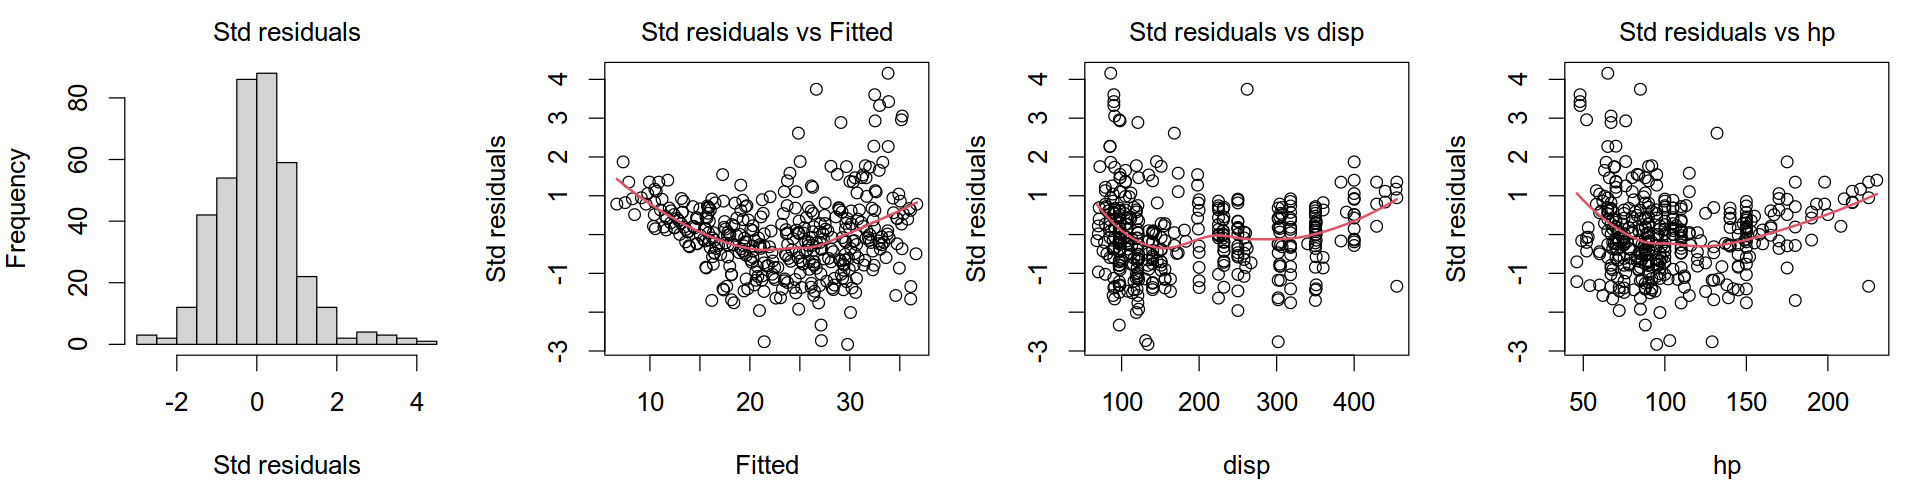

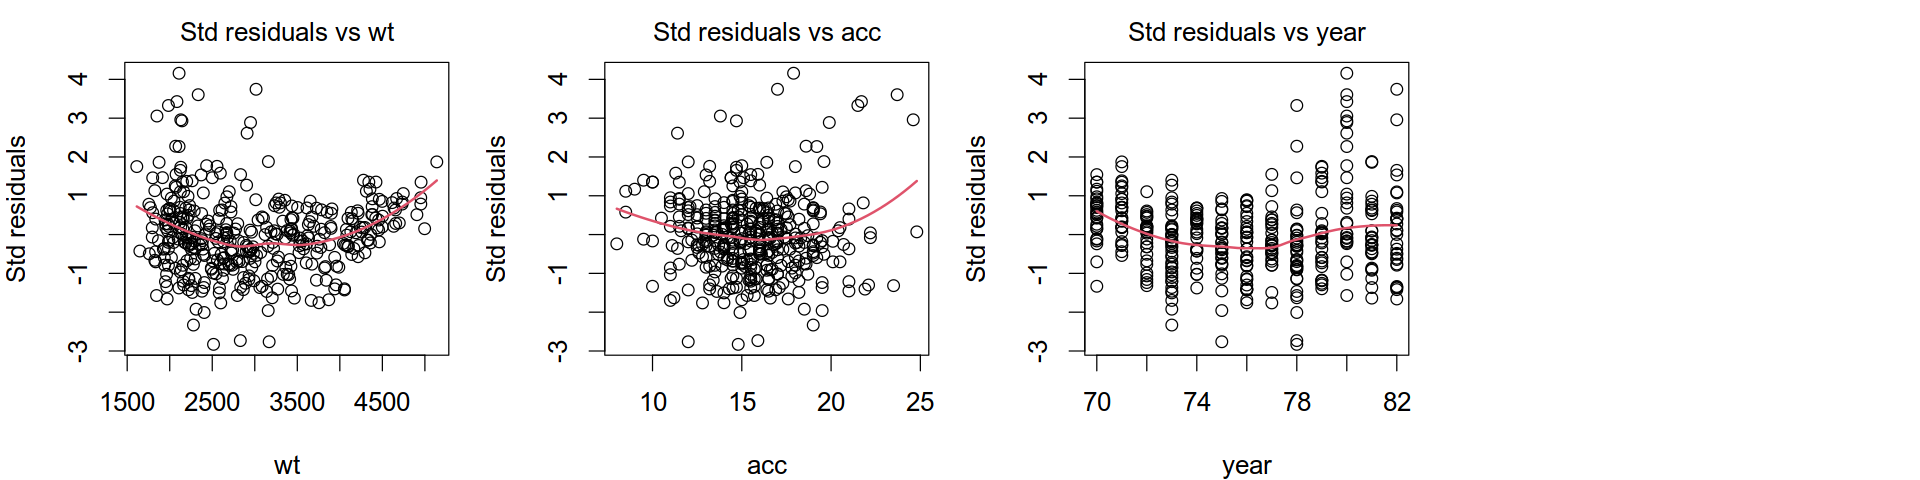

In [7]:
options(repr.plot.width=16, repr.plot.height=4)
par(mfrow = c(1, 4), mar=c(4,4,2,1), cex=1.3)

plot(model)
r.std = rstandard(model)
y.hat = fitted(model)
with(auto,{
    hist(r.std, main="Std residuals", cex.main=1, font.main = 1, xlab = "Std residuals")
    resplot(y.hat, r.std, xlab = "Fitted", ylab="Std residuals")
    resplot(disp, r.std, xlab = "disp", ylab="Std residuals")
    resplot(hp, r.std, xlab = "hp", ylab="Std residuals")
    resplot(wt, r.std, xlab = "wt", ylab="Std residuals")
    resplot(acc, r.std, xlab = "acc", ylab="Std residuals")
    resplot(year, r.std, xlab = "year", ylab="Std residuals")
    }
)

Upon inspecting residual plots we choose to log-transform the response variable ``mpg`` and predictors ``disp``, ``hp``, and ``wt``. 

*(In fact, I tried various transformations until I found the right ones.)*

#### Step 1.2. Transformed data analysis

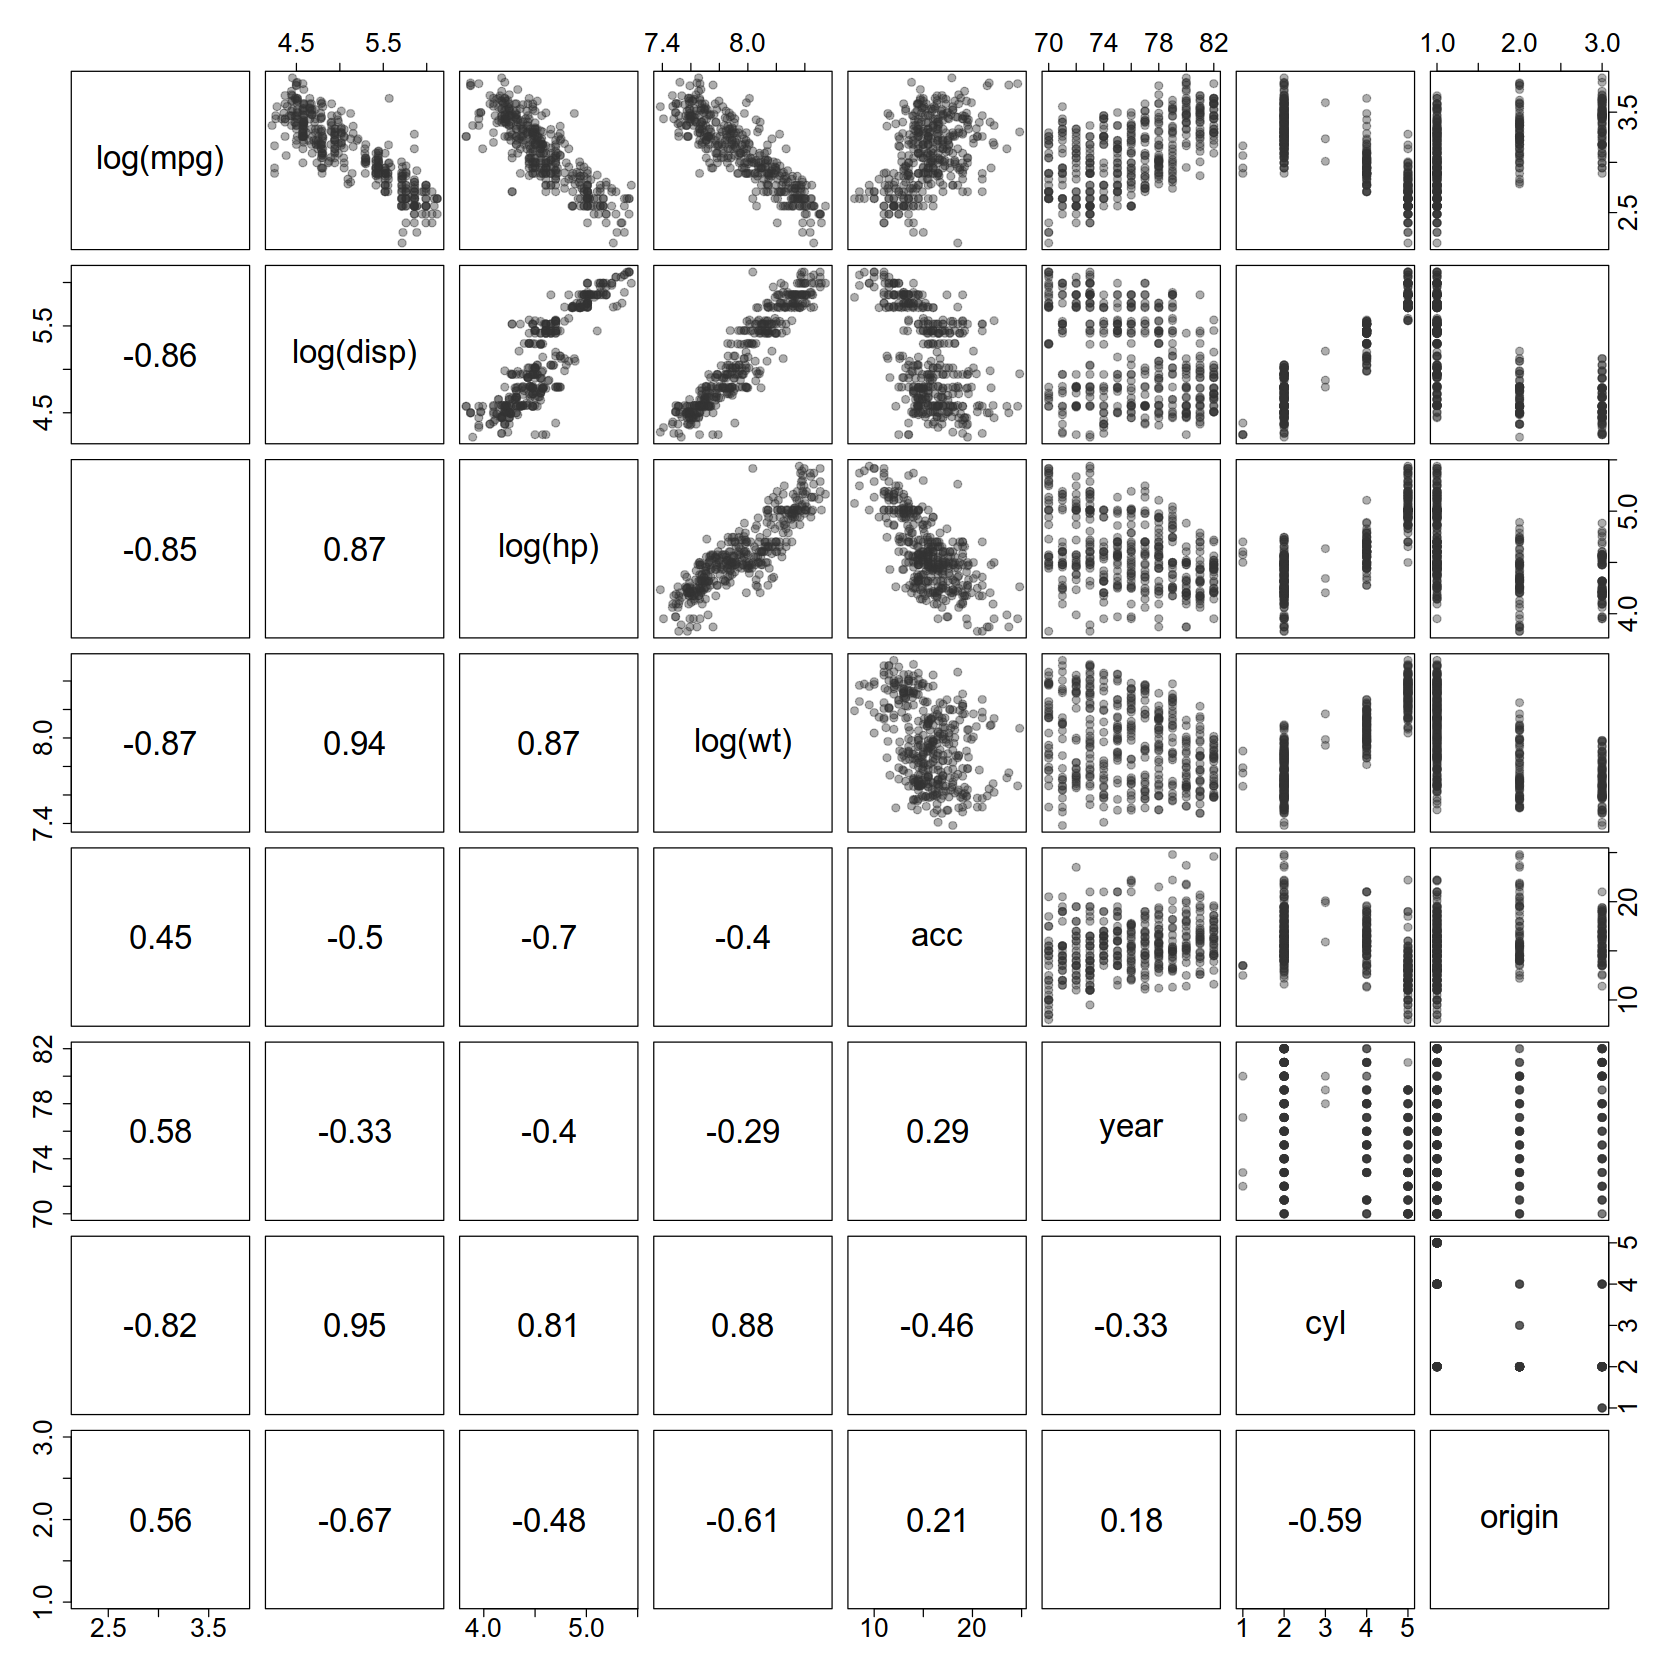

In [8]:
options(repr.plot.width=14, repr.plot.height=14)

pairs(log(mpg) ~ log(disp) + log(hp) + log(wt) + acc + year + cyl + origin, data=auto, 
      lower.panel=panel.cor, 
      cex.labels=2.5,
      cex=2,
      cex.axis=2,
      pch=20, 
      col=rgb(red=0.2, green=0.2, blue=0.2, alpha=0.4)
     )

In [9]:
model = lm(log(mpg) ~ log(disp) + log(hp) + log(wt) + acc + year + cyl + origin, data=auto)
summary(model)


Call:
lm(formula = log(mpg) ~ log(disp) + log(hp) + log(wt) + acc + 
    year + cyl + origin, data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35338 -0.06431 -0.00036  0.05722  0.42422 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.319142   0.401062  15.756  < 2e-16 ***
log(disp)   -0.015228   0.058538  -0.260 0.794896    
log(hp)     -0.259137   0.057114  -4.537 7.66e-06 ***
log(wt)     -0.535694   0.085322  -6.278 9.34e-10 ***
acc         -0.010078   0.003757  -2.682 0.007631 ** 
year         0.029218   0.001738  16.807  < 2e-16 ***
cyl4         0.268649   0.063285   4.245 2.75e-05 ***
cyl5         0.329135   0.093862   3.507 0.000508 ***
cyl6         0.197351   0.074174   2.661 0.008130 ** 
cyl8         0.193408   0.081549   2.372 0.018205 *  
origin2      0.030145   0.020877   1.444 0.149587    
origin3      0.048437   0.020053   2.415 0.016190 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Res

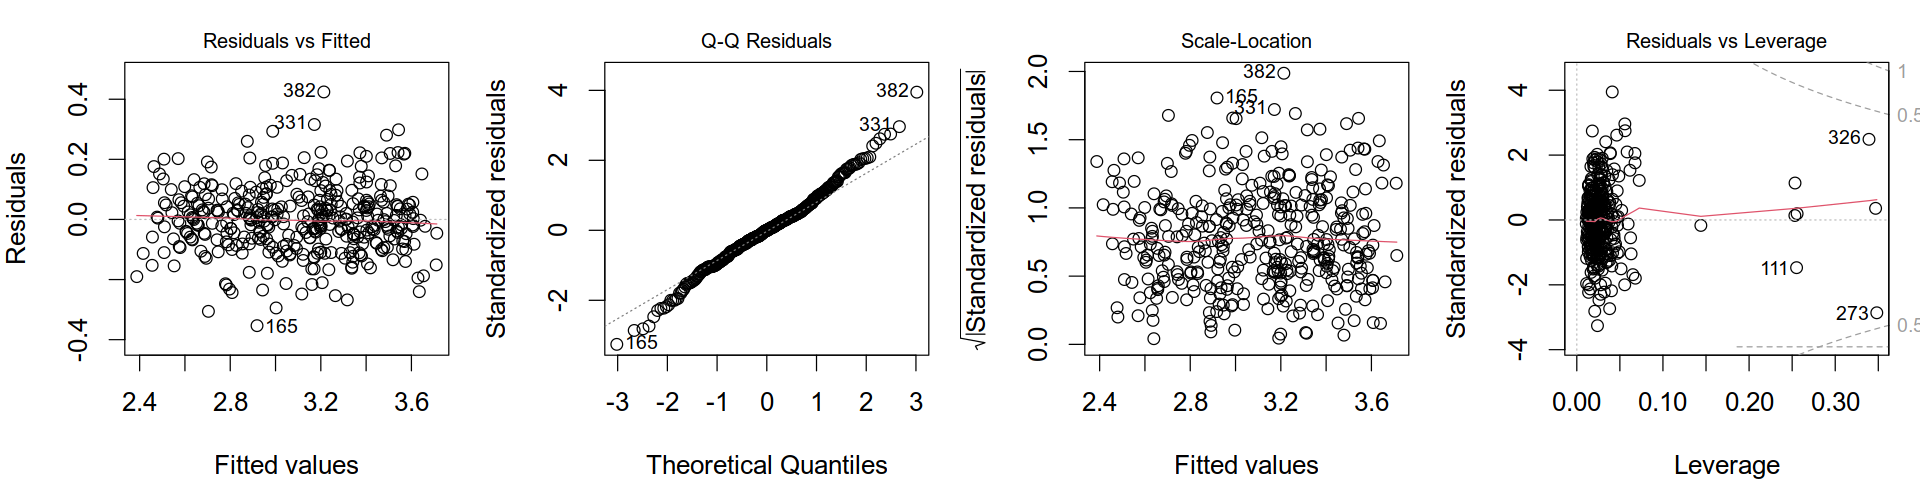

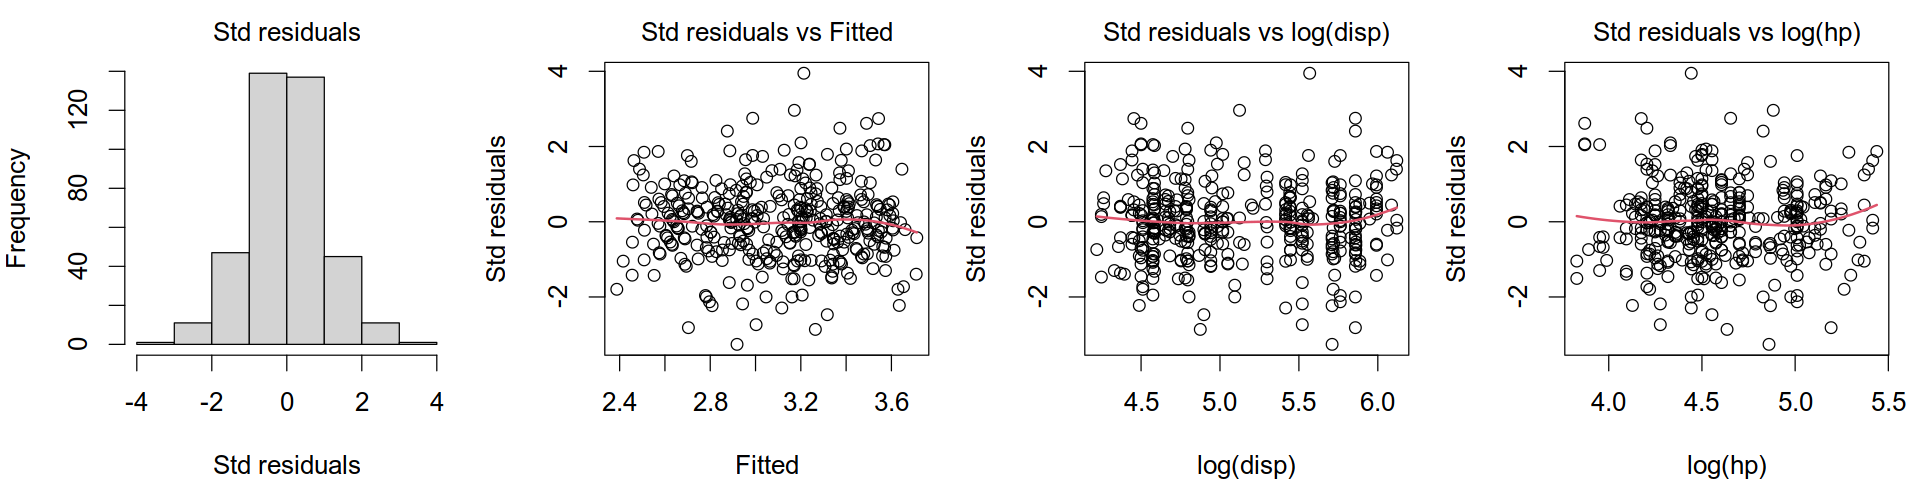

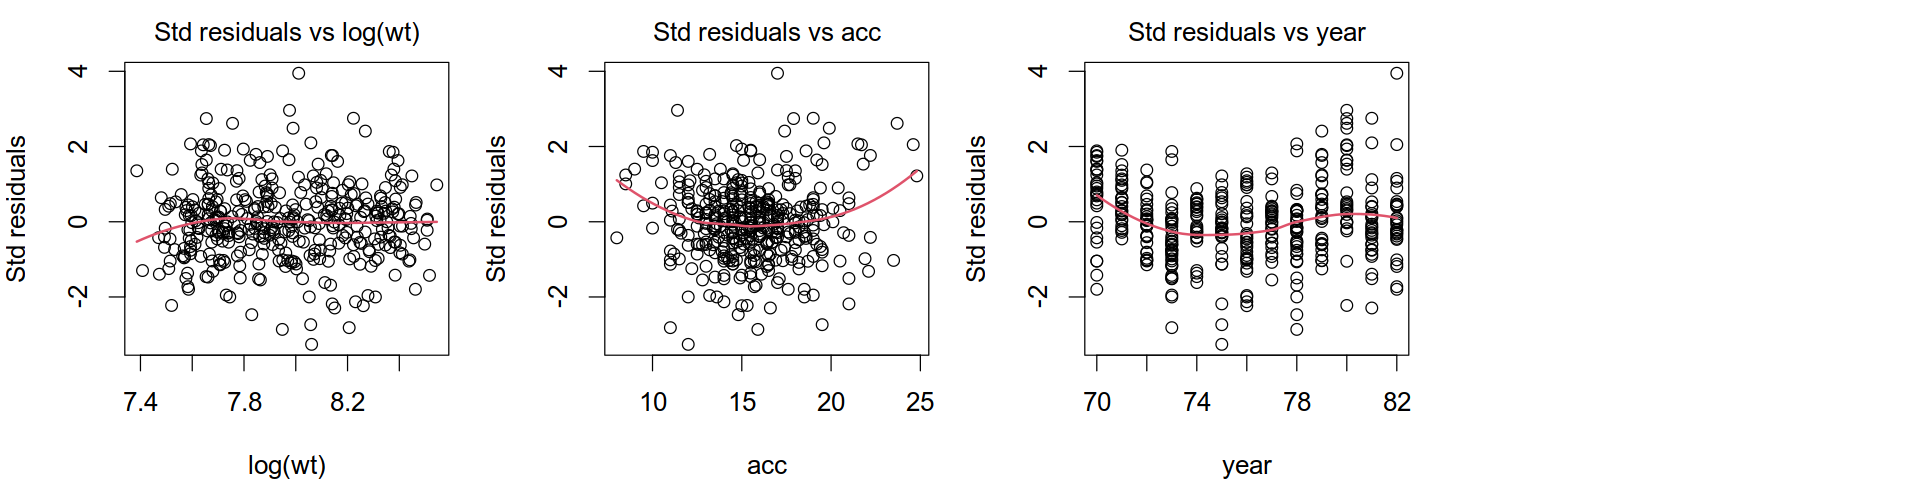

In [10]:
options(repr.plot.width=16, repr.plot.height=4)
par(mfrow = c(1, 4), mar=c(4,4,2,1), cex=1.3)

plot(model)
r.std = rstandard(model)
y.hat = fitted(model)
with(auto,{
    hist(r.std, main="Std residuals", cex.main=1, font.main = 1, xlab="Std residuals")
    resplot(y.hat, r.std, xlab = "Fitted", ylab="Std residuals")
    resplot(log(disp), r.std, xlab = "log(disp)", ylab="Std residuals")
    resplot(log(hp), r.std, xlab = "log(hp)", ylab="Std residuals")
    resplot(log(wt), r.std, xlab = "log(wt)", ylab="Std residuals")
    resplot(acc, r.std, xlab = "acc", ylab="Std residuals")
    resplot(year, r.std, xlab = "year", ylab="Std residuals")
    }
)

The normality assumptions are met now. There are minor deviations in the standardised residuals vs ``acc`` and ``year`` plots, but these are the best results I could get. 

---

### Step 2.

Clean up the data. Find outliers and leverage cases. Recall the rough criterions:

$$
|r_i| > 2\text{ to } 4 \qquad
h_{ii} > 2 \cdot \frac{p+1}{n} \qquad
D_i > \frac{4}{n-p-1}
$$

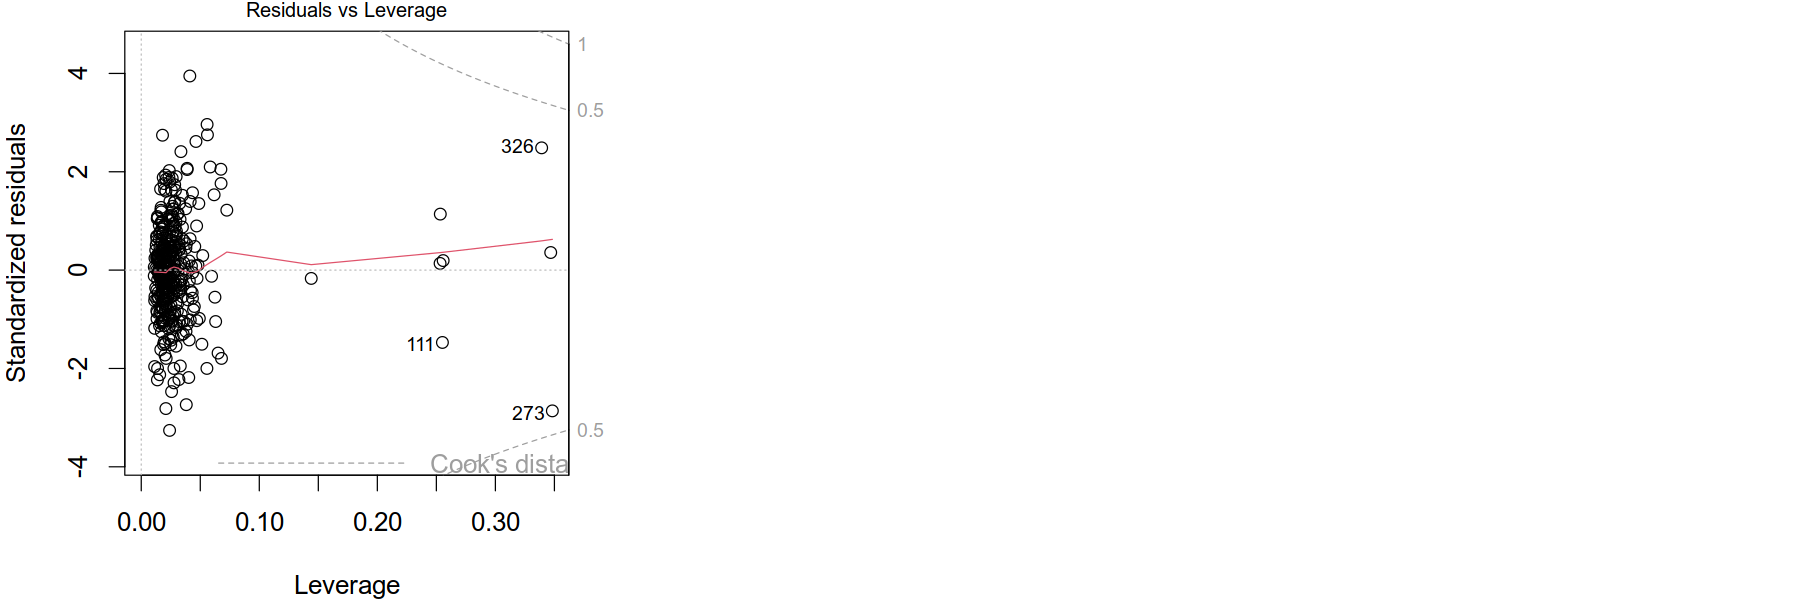

In [11]:
# built-in plot
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow = c(1, 3), mar=c(4,4,1,1), cex=1.3)
plot(model, which=5)

In [12]:
model # the model has 11 slopes and 1 intercept


Call:
lm(formula = log(mpg) ~ log(disp) + log(hp) + log(wt) + acc + 
    year + cyl + origin, data = auto)

Coefficients:
(Intercept)    log(disp)      log(hp)      log(wt)          acc         year  
    6.31914     -0.01523     -0.25914     -0.53569     -0.01008      0.02922  
       cyl4         cyl5         cyl6         cyl8      origin2      origin3  
    0.26865      0.32913      0.19735      0.19341      0.03014      0.04844  


In [13]:
n = nrow(auto) # number of cases
p = 11         # number of slopes

In [14]:
r = rstandard(model)        # standardised residuals
h = hatvalues(model)        # leverages
D = cooks.distance(model)   # Cook's distance

In [15]:
outliers = abs(r) > 3
sum(outliers)               # to potential outliers

[1] 2

In [16]:
leverages = h > 2*(p+1)/n
sum(leverages)              # 16 high-leverage cases! a lot! the threshold is too low

[1] 16

In [17]:
influence = D > 4/(n-p-1)
sum(influence)              # 27 influential cases! a lot! the threshold is too low

[1] 27

In [18]:
sum(outliers & leverages)   # no bad leverages

[1] 0

In [19]:
sum(outliers & influence)   # both outliers are influential

[1] 2

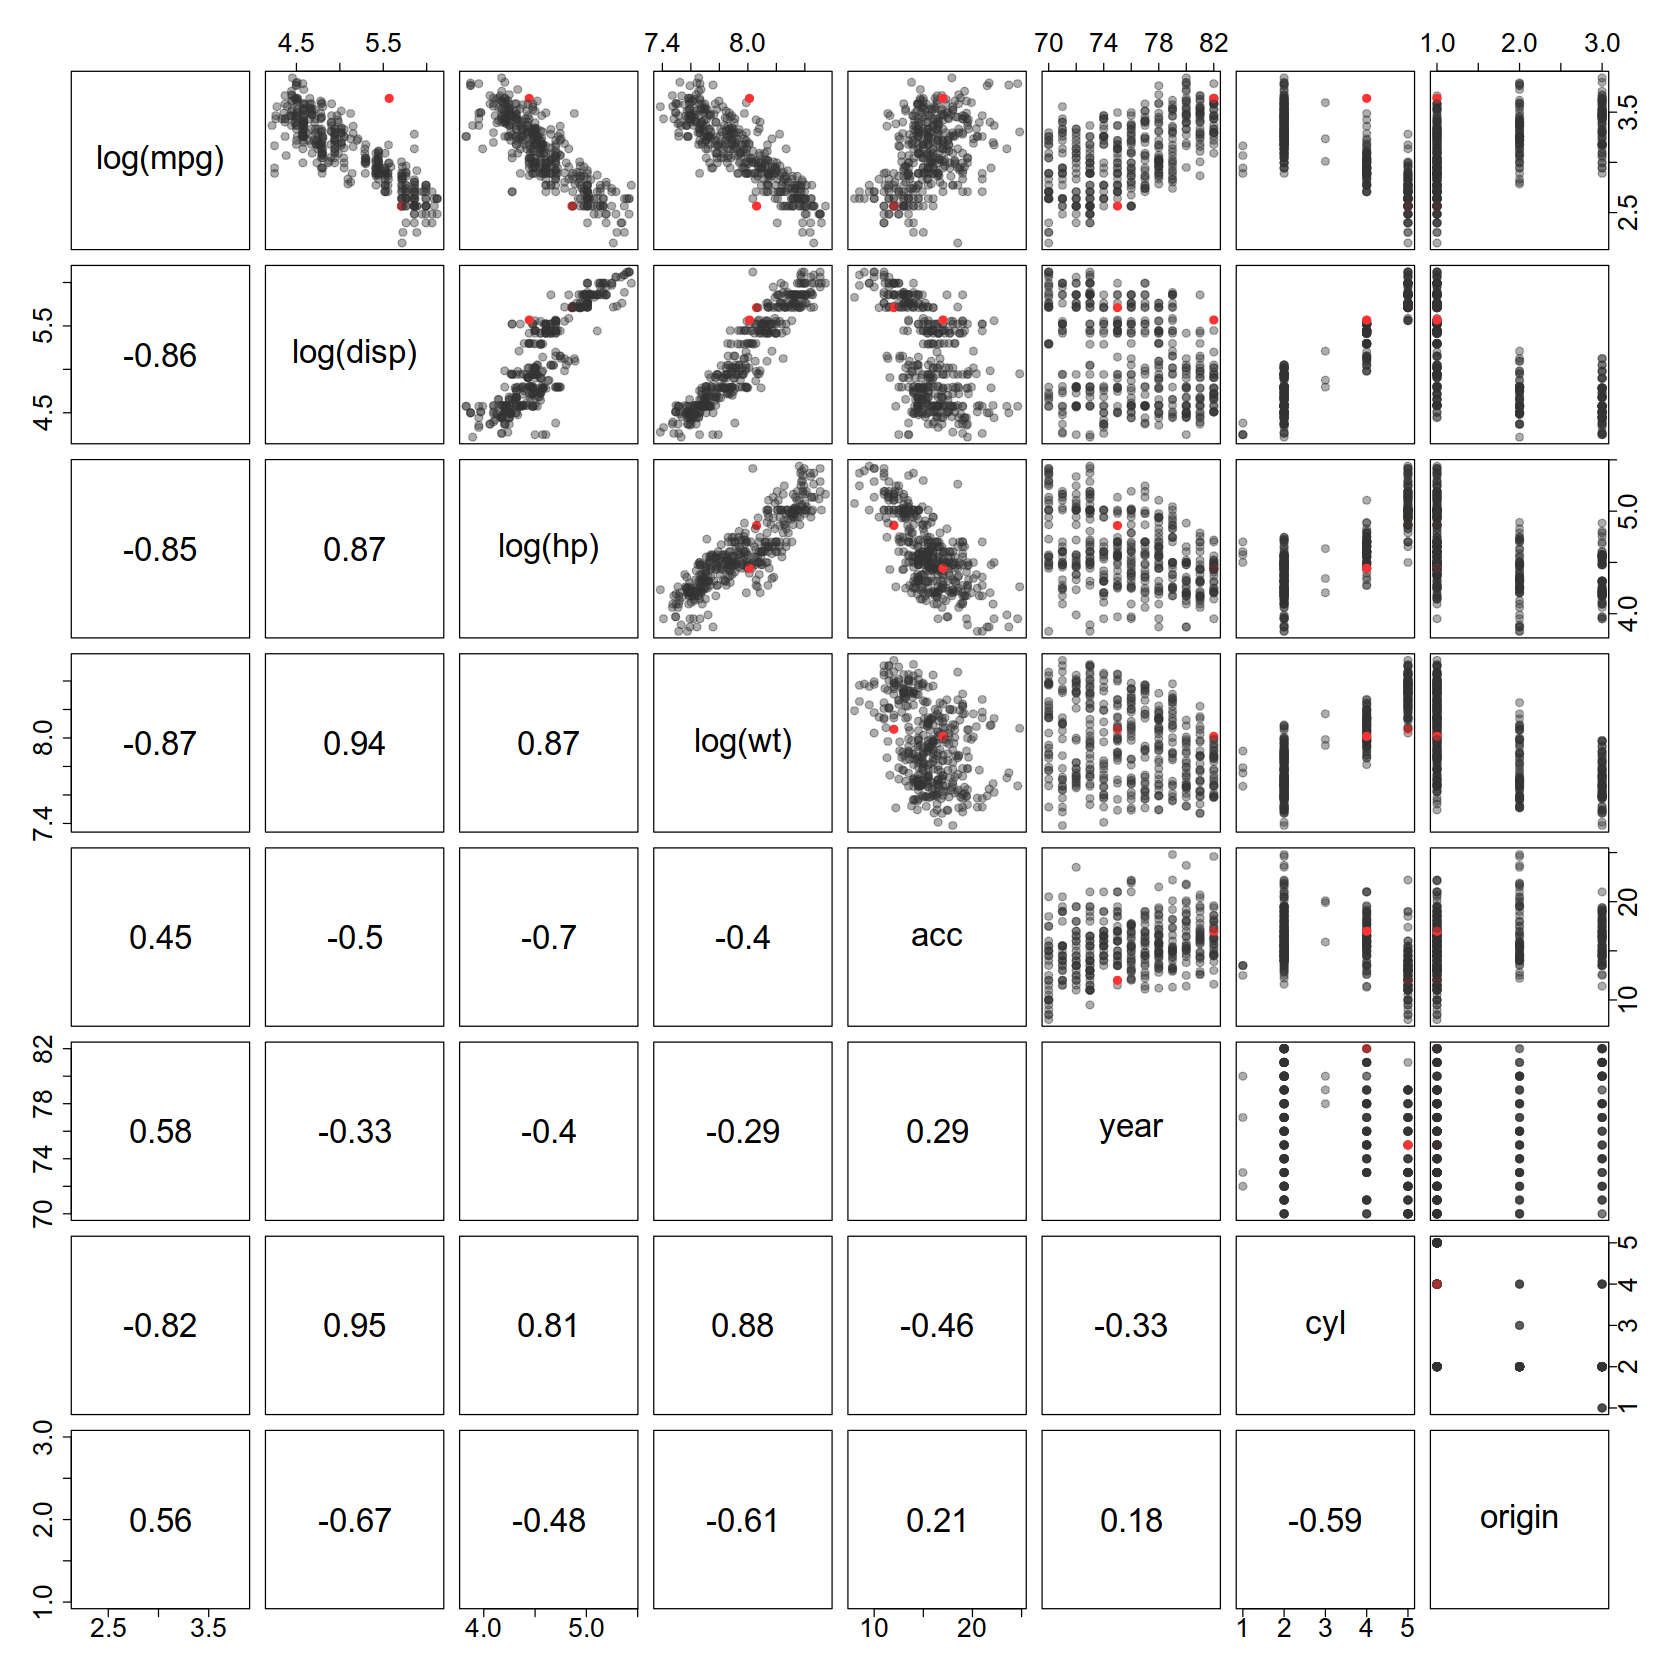

In [20]:
options(repr.plot.width=14, repr.plot.height=14)

# find the location of the outliers in the scatterplot matrix
flag = as.numeric(outliers)

pairs(log(mpg) ~ log(disp) + log(hp) + log(wt) + acc + year + cyl + origin, data=auto, 
      lower.panel=panel.cor, 
      cex.labels=2.5,
      cex=2,
      cex.axis=2,
      pch=20, 
      col=rgb(red=0.2 + flag*0.8, green=0.2, blue=0.2, alpha=0.4 + flag*0.6) # highlight outliers in red
     )

In [21]:
# inspect outliers
auto[outliers,]

mpg cyl disp hp  wt   acc year origin name                             
165 13  8   302  129 3169 12  75   1      ford mustang ii                  
382 38  6   262   85 3015 17  82   1      oldsmobile cutlass ciera (diesel)

The outliers are [Ford Mustang II](https://en.wikipedia.org/wiki/Ford_Mustang_(second_generation)) and [Oldsmobile Cutclass Ciera](https://en.wikipedia.org/wiki/Oldsmobile_Cutlass_Ciera)

<table><tr>
    <td>
        <img src="https://s3.amazonaws.com/images.hagerty.com/vehicle/web/30448_1974%20MustangII_front.jpg" alt="Mustang" style="height: 200px;"/>
    </td>
    <td>
        <img src="https://upload.wikimedia.org/wikipedia/commons/1/10/1996_Oldsmobile_Ciera.jpg" alt="Oldsmobyle" style="height: 140px;"/>
    </td>
</tr></table>

---

### Step 3. 

Find the "best" model.

We split the data 80/20 into a "training" set and a "test" set:

In [22]:
set.seed(13)                       # fix randomisation seed
test_ind = sample(n, size = n/5)   # randomly select 20% of row numbers

test  = auto[test_ind, ]           # test data - "test_ind" rows only
train = auto[-test_ind, ]          # training data - not "test_ind" rows

We start by fitting the "full" model having all predictors:

In [23]:
# full model
model0 = lm(log(mpg) ~ log(disp) + log(hp) + log(wt) + acc + year + cyl + origin, data=train)
summary(model0)


Call:
lm(formula = log(mpg) ~ log(disp) + log(hp) + log(wt) + acc + 
    year + cyl + origin, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34885 -0.06678  0.00157  0.05800  0.33001 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.301434   0.456128  13.815  < 2e-16 ***
log(disp)   -0.029096   0.068088  -0.427 0.669447    
log(hp)     -0.241950   0.066339  -3.647 0.000312 ***
log(wt)     -0.526208   0.103363  -5.091 6.28e-07 ***
acc         -0.009704   0.004191  -2.315 0.021265 *  
year         0.028167   0.001915  14.708  < 2e-16 ***
cyl4         0.282256   0.070731   3.991 8.28e-05 ***
cyl5         0.482235   0.110314   4.371 1.70e-05 ***
cyl6         0.201042   0.083589   2.405 0.016768 *  
cyl8         0.200118   0.091790   2.180 0.030016 *  
origin2      0.016901   0.023182   0.729 0.466533    
origin3      0.039623   0.021553   1.838 0.066977 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Re

The individual t-tests indicate that the ``log(disp)`` predictor is insignificant (p-value is 66.9%) in the presence of the remaining predictors. Hence we remove this predictor and fit a reduced model:

In [24]:
# first reduced model
model1 = lm(log(mpg) ~ log(hp) + log(wt) + acc + year + cyl + origin, data=train)
summary(model1)


Call:
lm(formula = log(mpg) ~ log(hp) + log(wt) + acc + year + cyl + 
    origin, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35177 -0.06616  0.00198  0.05998  0.33347 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.373393   0.423334  15.055  < 2e-16 ***
log(hp)     -0.240564   0.066171  -3.636 0.000326 ***
log(wt)     -0.554649   0.078978  -7.023 1.44e-11 ***
acc         -0.009154   0.003983  -2.298 0.022237 *  
year         0.028256   0.001901  14.861  < 2e-16 ***
cyl4         0.269613   0.064159   4.202 3.48e-05 ***
cyl5         0.465820   0.103270   4.511 9.25e-06 ***
cyl6         0.179355   0.066329   2.704 0.007238 ** 
cyl8         0.174226   0.068857   2.530 0.011904 *  
origin2      0.021621   0.020353   1.062 0.288946    
origin3      0.043525   0.019497   2.232 0.026318 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1067 on 303 degrees of freedom
Multiple R

The individual t-tests indicate that the ``origin2`` dummy variable is insignificant (p-value is 28.9%) in the presence of the remaining predictors. For simplicity, we remove the ``origin`` predictor overall and fit a further reduced model:

In [25]:
# second reduced model
model2 = lm(log(mpg) ~ log(hp) + log(wt) + acc + year + cyl, data=train)
summary(model2)


Call:
lm(formula = log(mpg) ~ log(hp) + log(wt) + acc + year + cyl, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35990 -0.06887  0.00310  0.06136  0.36581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.700720   0.399146  16.788  < 2e-16 ***
log(hp)     -0.215011   0.065210  -3.297 0.001092 ** 
log(wt)     -0.608807   0.074983  -8.119 1.17e-14 ***
acc         -0.008134   0.003972  -2.048 0.041429 *  
year         0.028339   0.001830  15.484  < 2e-16 ***
cyl4         0.248339   0.063344   3.920 0.000109 ***
cyl5         0.461456   0.102093   4.520 8.86e-06 ***
cyl6         0.152132   0.065519   2.322 0.020894 *  
cyl8         0.148963   0.068244   2.183 0.029812 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1072 on 305 degrees of freedom
Multiple R-squared:  0.9025,	Adjusted R-squared:  0.8999 
F-statistic: 352.9 on 8 and 305 DF,  p-value: < 2.2e-16


The individual t-tests indicate that predictor ``acc`` may be less significant (p-value is 4.1%) than the remaining ones. We remove the ``acc`` predictor and fit a further reduced model.

In [26]:
# third reduced model 
model3 = lm(log(mpg) ~ log(hp) + log(wt) + year + cyl, data=train)
summary(model3)


Call:
lm(formula = log(mpg) ~ log(hp) + log(wt) + year + cyl, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35737 -0.06842  0.00513  0.06573  0.36977 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.821604   0.396812  17.191  < 2e-16 ***
log(hp)     -0.119026   0.045573  -2.612 0.009453 ** 
log(wt)     -0.698379   0.061222 -11.407  < 2e-16 ***
year         0.028676   0.001832  15.651  < 2e-16 ***
cyl4         0.242494   0.063609   3.812 0.000167 ***
cyl5         0.464513   0.102614   4.527 8.59e-06 ***
cyl6         0.153339   0.065857   2.328 0.020545 *  
cyl8         0.158242   0.068447   2.312 0.021448 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1077 on 306 degrees of freedom
Multiple R-squared:  0.9012,	Adjusted R-squared:  0.8989 
F-statistic: 398.5 on 7 and 306 DF,  p-value: < 2.2e-16


The individual t-tests indicate that ``cyl6`` and ``cyl8`` dummy variables might less significant (p-values are 2.05% and 2.14%) than the remaining predictors. We remove the ``cyl`` predictor overall and fit a further reduced model.

In [27]:
# fourth reduced model
model4 = lm(log(mpg) ~ log(hp) + log(wt) + year, data=train)
summary(model4)


Call:
lm(formula = log(mpg) ~ log(hp) + log(wt) + year, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38201 -0.07390  0.00664  0.06241  0.34226 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.676052   0.288197  26.635  < 2e-16 ***
log(hp)     -0.151669   0.042812  -3.543 0.000457 ***
log(wt)     -0.775213   0.050367 -15.391  < 2e-16 ***
year         0.030095   0.001912  15.739  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1139 on 310 degrees of freedom
Multiple R-squared:  0.8881,	Adjusted R-squared:  0.887 
F-statistic: 820.3 on 3 and 310 DF,  p-value: < 2.2e-16


There's nothing else to be removed, so we can start comparing the models we have built. We will begin by testing these models on the ``test`` dataset and computing the mean sum of errors squared, $MS_E$, for each of our models:

In [28]:
n.test = nrow(test) # the number of cases in the test dataset

# prediced values of log(mpg) for each model
lmpg0 = predict(model0, newdata = test)
lmpg1 = predict(model1, newdata = test)
lmpg2 = predict(model2, newdata = test)
lmpg3 = predict(model3, newdata = test)
lmpg4 = predict(model4, newdata = test)

# residual standard errors for the test data
MSE0 = sum( (lmpg0 - log(test$mpg))^2 ) / (n.test-12) 
MSE1 = sum( (lmpg1 - log(test$mpg))^2 ) / (n.test-11)
MSE2 = sum( (lmpg2 - log(test$mpg))^2 ) / (n.test-9)
MSE3 = sum( (lmpg3 - log(test$mpg))^2 ) / (n.test-8)
MSE4 = sum( (lmpg4 - log(test$mpg))^2 ) / (n.test-4)

Next, we will use the summary table of each model to get access to the wanted quantities: $\hat\sigma$ and $R^2_{adj}$

In [29]:
# save summary tables into variables
s0 = summary(model0)
s1 = summary(model1)
s2 = summary(model2)
s3 = summary(model3)
s4 = summary(model4)
# Execute this cell. Then write s0$ and press <tab> to see the "inside" variable

In [30]:
# Compare the models. We want to display the following quantities:
# - residual standard errors for the train data - smaller is better
# - residual standard error for the test data - smaller is better
# - R2-adjusted values - bigger is better
# - Akaike Information Criterion (AIC) - smaller is better
# - Bayesian Information Criterion (BIC) - smaller is better
# We could also include F-values and R2, but they are less important/informative

table = data.frame(row.names=c("Full","-disp","-origin","-acc","-cyl"),
                   F = c(s0$fstatistic[1],s1$fstatistic[1],s2$fstatistic[1],s3$fstatistic[1],s4$fstatistic[1]),
                   sigma.train = c(s0$sigma,s1$sigma,s2$sigma,s3$sigma,s4$sigma),                
                   sigma.test = sqrt(c(MSE0,MSE1,MSE2,MSE3,MSE4)),                  
                   R2 = c(s0$r.squared,s1$r.squared,s2$r.squared,s3$r.squared,s4$r.squared),   
                   R2.adj = c(s0$adj.r.squared,s1$adj.r.squared,s2$adj.r.squared,s3$adj.r.squared,s4$adj.r.squared),   
                   AIC = c(AIC(model0),AIC(model1),AIC(model2),AIC(model3),AIC(model4)),   
                   BIC = c(BIC(model0),BIC(model1),BIC(model2),BIC(model3),BIC(model4))  
                  )

round(table, 4)

F        sigma.train sigma.test R2     R2.adj AIC       BIC      
Full    258.9408 0.1068      0.1348     0.9041 0.9006 -499.7739 -451.0318
-disp   285.5870 0.1067      0.1337     0.9041 0.9009 -501.5841 -456.5914
-origin 352.8921 0.1072      0.1341     0.9025 0.8999 -500.4483 -462.9544
-acc    398.5464 0.1077      0.1347     0.9012 0.8989 -498.1602 -464.4157
-cyl    820.2636 0.1139      0.1236     0.8881 0.8870 -467.2528 -448.5059

**Conclusions.** We could choose the third reduced model, ``model3``, as our "best" model:

- ``model3`` has $R^2_{adj}$ and AIC values similar to their counterparts in other models but has less predictors (except the last model). 

- ``model3`` has the lowest BIC value.

- ``model4`` has the smallest $\hat\sigma_{test}$ value, but this is the only indicator where it leads.

### Variance Inflation Factors

In [33]:
# variation inflation factors are used to spot multicollinearity
# i.e. a near-linear relationship between the predictors
# install.packages("car")

library(car)
vif(model0)

Loading required package: carData



GVIF      Df GVIF^(1/(2*Df))
log(disp) 36.802209 1  6.066482       
log(hp)   14.382839 1  3.792471       
log(wt)   23.313416 1  4.828397       
acc        3.632505 1  1.905913       
year       1.374391 1  1.172344       
cyl       18.637621 4  1.441447       
origin     2.941877 2  1.309653

In [34]:
vif(model3)

GVIF     Df GVIF^(1/(2*Df))
log(hp) 6.670288 1  2.582690       
log(wt) 8.037269 1  2.835008       
year    1.236247 1  1.111866       
cyl     6.539215 4  1.264564

---